In [3]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.mixture
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

# Data description

Data source: https://archive.ics.uci.edu/dataset/186/wine+quality or https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

The set of 11 attributes/variables based on physicochemical tests and 1 variable describing quality.

|Attribute|Description|
|:-------|:-------|
|fixed acidity|most acids involved with wine or fixed or nonvolatile (do not evaporate readily)|
|volatile acidity|the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste|
|citric acid|found in small quantities, citric acid can add 'freshness' and flavor to wines|
|residual sugar|the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet|
|chlorides|the amount of salt in the wine|
|free sulfur dioxide|the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine|
|total sulfur dioxide|amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine|
|density|the density of water is close to that of water depending on the percent alcohol and sugar content|
|pH|describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale|
|sulphates|a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant|
|alcohol|the percent alcohol content of the wine|
|quality|output variable (based on sensory data, score between 0 and 10)

# Data loading

In [93]:
#E:\\Python Scripts\\SU\\CV3\\winequality-red.csv
df = pd.read_csv('C:\\Users\\msi pc\\Documents\\PythonProjects\\SU\\CV3\\winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [95]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

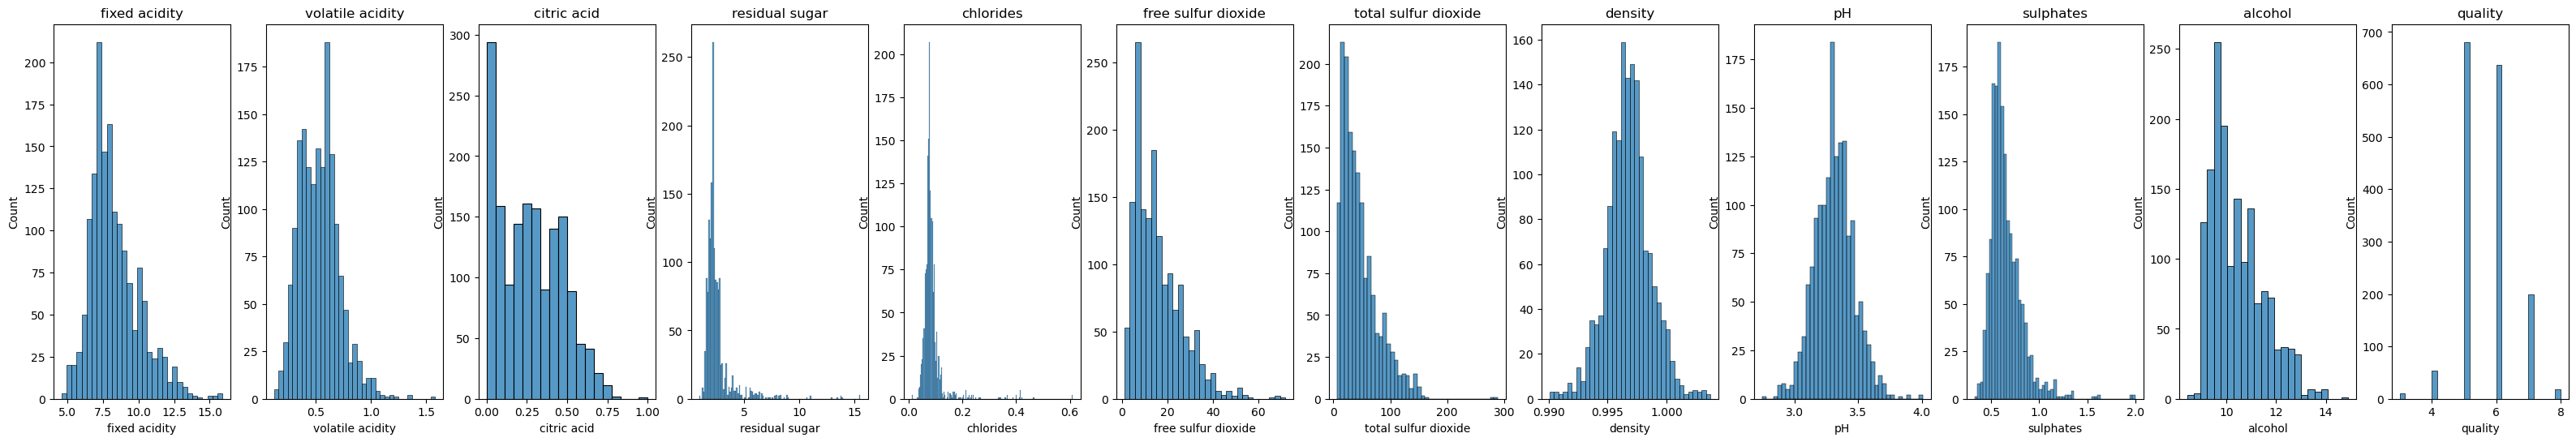

In [96]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

# Výběr scaling method
- Pro data, které mají gaussian like distribuci můžeme aplikovat normalizaci nebo standardizaci.  
- Zvolím si standardizaci, jelikož ji osobně preferuji více než normalizaci.
- Pro tail-like distribuce, jako například distribuce 'total sulfur dioxide', se hodí použít power transform, která je udělá více gaussian-like

In [99]:
df.quality.value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [100]:
df['quality_class'] = 'normal'
df.loc[df.quality <= 4, 'quality_class'] = 'bad'
df.loc[df.quality >= 7, 'quality_class'] = 'good'
df.quality_class.value_counts()

quality_class
normal    1319
good       217
bad         63
Name: count, dtype: int64

<Axes: >

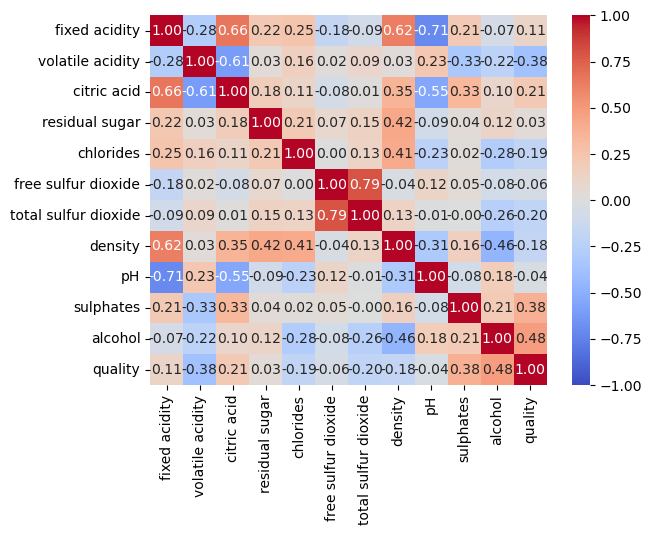

In [101]:
sns.heatmap(df_only_numeric.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

In [102]:
top_5_features_for_quality = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'chlorides']

In [103]:
dfToWorkWith = df_only_numeric[top_5_features_for_quality]

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'chlorides'}>, <Axes: >]], dtype=object)

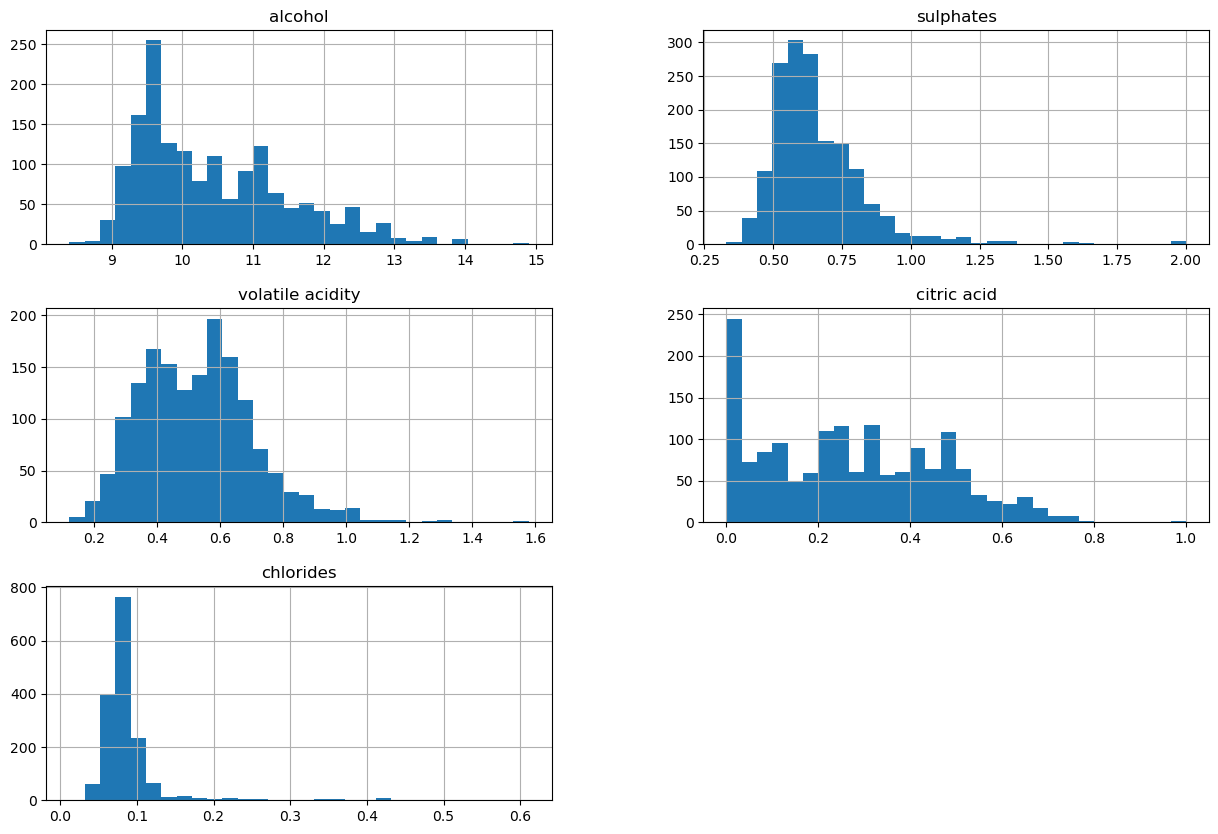

In [104]:
dfToWorkWith.hist(bins=30, figsize=(15, 10))

In [106]:
StanColumns = ['chlorides', 'volatile acidity', 'sulphates']
PowerColumns = ['citric acid', 'alcohol']

# Data preprocessing before clustering
- Why do we need to preprocess the data?

In [113]:
stanScaler = sklearn.preprocessing.StandardScaler()
powerTransformer = sklearn.preprocessing.PowerTransformer()

In [114]:
dfToWorkWith.loc[:,StanColumns] = stanScaler.fit_transform(dfToWorkWith[StanColumns].values)

C:\Users\msi pc\AppData\Local\Temp\ipykernel_8076\2010889212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToWorkWith.loc[:,StanColumns] = stanScaler.fit_transform(dfToWorkWith[StanColumns].values)


In [117]:
dfToWorkWith.loc[:,PowerColumns] = powerTransformer.fit_transform(dfToWorkWith[PowerColumns].values)

C:\Users\msi pc\AppData\Local\Temp\ipykernel_8076\2967149253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToWorkWith.loc[:,PowerColumns] = powerTransformer.fit_transform(dfToWorkWith[PowerColumns].values)


In [120]:
dfToWorkWith

alcohol  sulphates  volatile acidity  citric acid  chlorides
0    -1.075025  -0.579207          0.961877    -1.531109  -0.243707
1    -0.500860   0.128950          1.967442    -1.531109   0.223875
2    -0.500860  -0.048089          1.297065    -1.255359   0.096353
3    -0.500860  -0.461180         -1.384443     1.398471  -0.264960
4    -1.075025  -0.579207          0.961877    -1.531109  -0.243707
...        ...        ...               ...          ...        ...
1594  0.292864  -0.461180          0.403229    -0.993315   0.053845
1595  0.888124   0.601055          0.123905    -0.867068  -0.541259
1596  0.734558   0.542042         -0.099554    -0.683294  -0.243707
1597 -0.018800   0.305990          0.654620    -0.743826  -0.264960
1598  0.734558   0.010924         -1.216849     1.031070  -0.434990

[1599 rows x 5 columns]

In [123]:
X = df_only_numeric.drop(columns=['quality']).values

In [125]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

# Clustering

## KMeans + clustering quality
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Do you know any technique to determine the best number of clusters?

In [129]:
clustering = sklearn.cluster.KMeans(n_clusters=5)
clustering.fit(X_min_max_scaled)

KMeans(n_clusters=5)

In [131]:
clustering.labels_

array([1, 1, 1, ..., 2, 2, 0])

In [132]:
pd.Series(clustering.labels_).value_counts()

1    527
4    341
3    293
0    242
2    196
Name: count, dtype: int64

In [135]:
clustering.inertia_

167.33540092270593

In [137]:
sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_)

0.19892376132199732

## Elbow method

#### Calculate SSE and Silhouette for differenet parameters of clusters $k \in <2, 15>$. Create visualization for both of clustering quality criteria

In [145]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(dfToWorkWith)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x00000208AD548EA0>)

In [146]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

Number of components Type of covariance    BIC score
15                    4               diag  3932.106369
14                    3               diag  3959.727381
16                    5               diag  3980.646638
19                    2               full  4009.997358
17                    6               diag  4083.443215

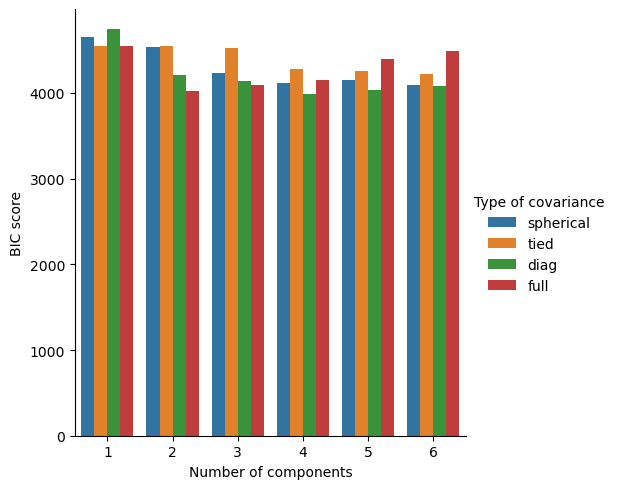

In [67]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [71]:
Y_ = grid_search.predict(dfToWorkWith)

In [164]:
dfToWorkWith.loc[:,'Cluster'] = Y_

C:\Users\msi pc\AppData\Local\Temp\ipykernel_8076\2686985766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToWorkWith.loc[:,'Cluster'] = Y_


In [166]:
dfToWorkWith

alcohol  sulphates  volatile acidity  citric acid  chlorides  Quality  \
0    -1.075025  -0.579207          0.961877    -1.531109  -0.243707        5   
1    -0.500860   0.128950          1.967442    -1.531109   0.223875        5   
2    -0.500860  -0.048089          1.297065    -1.255359   0.096353        5   
3    -0.500860  -0.461180         -1.384443     1.398471  -0.264960        6   
4    -1.075025  -0.579207          0.961877    -1.531109  -0.243707        5   
...        ...        ...               ...          ...        ...      ...   
1594  0.292864  -0.461180          0.403229    -0.993315   0.053845        5   
1595  0.888124   0.601055          0.123905    -0.867068  -0.541259        6   
1596  0.734558   0.542042         -0.099554    -0.683294  -0.243707        6   
1597 -0.018800   0.305990          0.654620    -0.743826  -0.264960        5   
1598  0.734558   0.010924         -1.216849     1.031070  -0.434990        6   

      Cluster  
0           1  
1           1  
2           1  
3           0  
4           1  
...       ...  
1594        1  
1595        1  
1596        1  
1597        1  
1598        0  

[1599 rows x 7 columns]

<Axes: xlabel='Cluster', ylabel='count'>

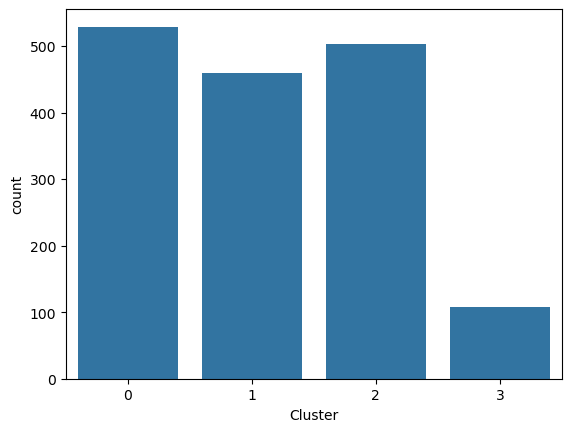

In [76]:
sns.countplot(data=dfToWorkWith, x='Cluster')

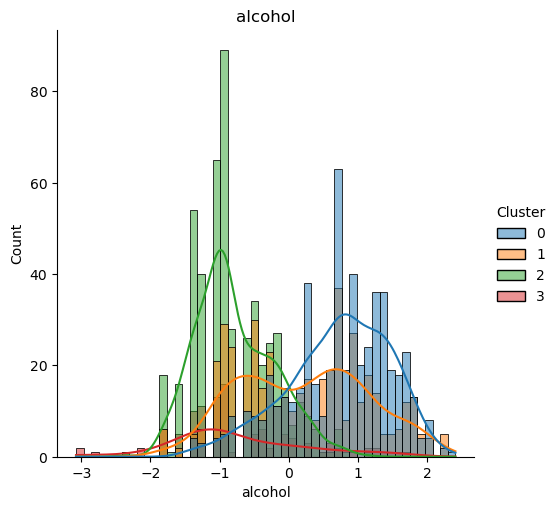

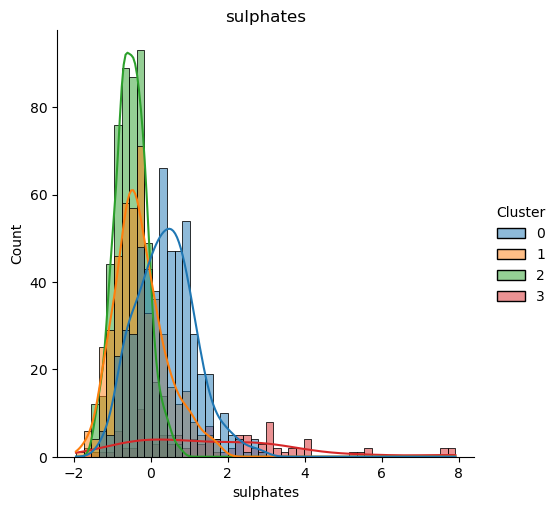

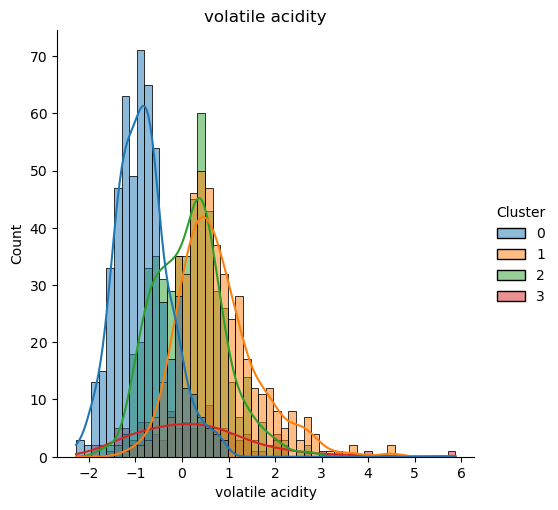

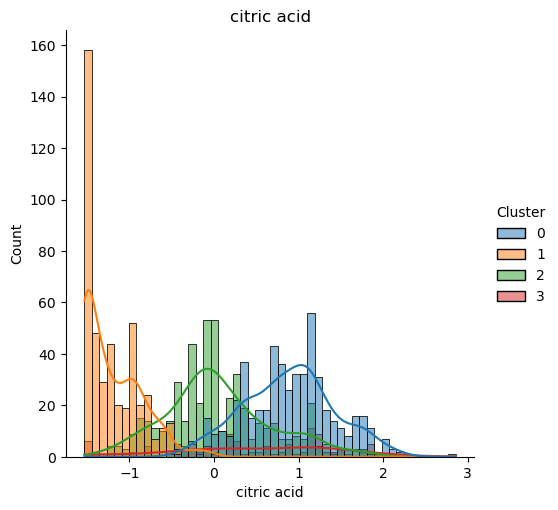

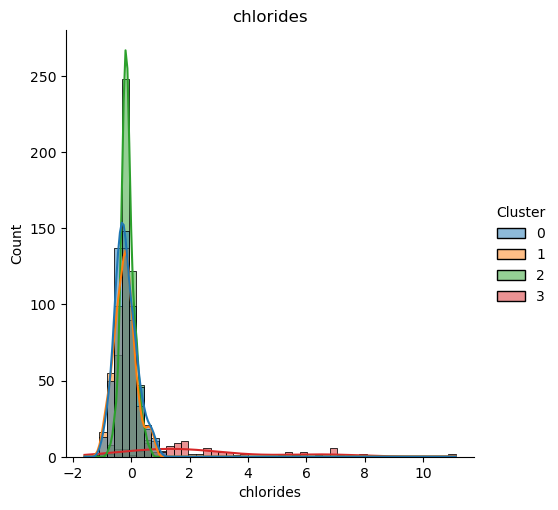

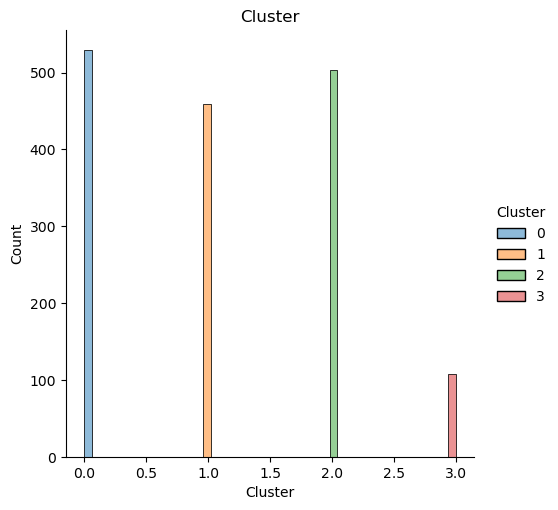

In [77]:
for column in dfToWorkWith.columns.values:
    sns.displot(data=dfToWorkWith, x=column, hue='Cluster', palette='tab10', kde=True, bins=50)
    plt.title(column)
    plt.show()

In [149]:
dfDefault = pd.read_csv('C:\\Users\\msi pc\\Documents\\PythonProjects\\SU\\CV3\\winequality-red.csv')
dfDefault.loc[:,'Cluster'] = Y_

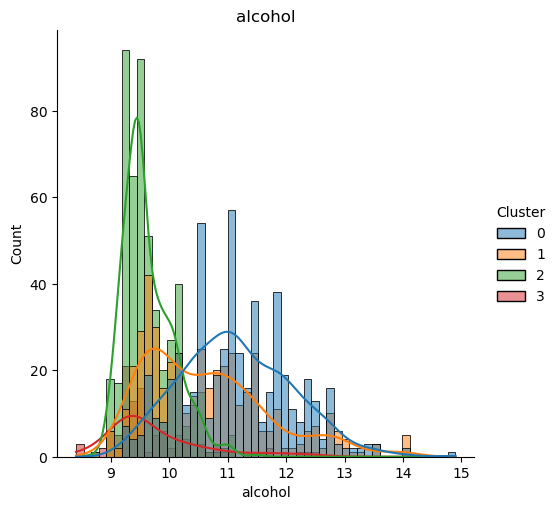

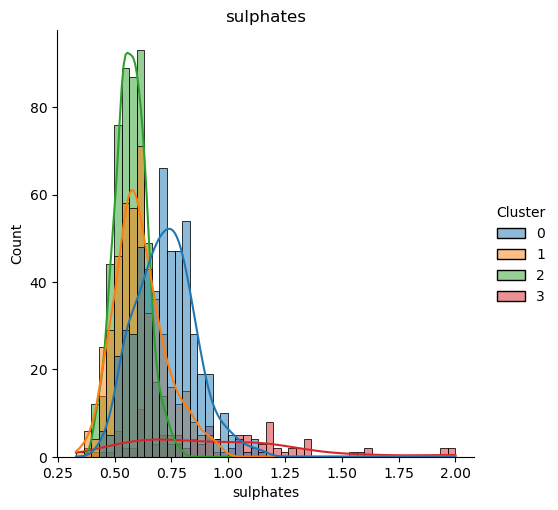

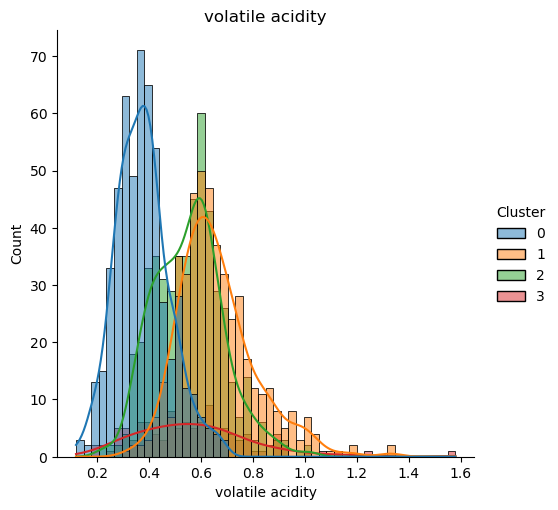

In [151]:
for column in list(dfToWorkWith.columns.values)[0:len(dfToWorkWith.columns.values) - 2]:#Do displot for all columns from dfToWorkWith expect last 2
    sns.displot(data=dfDefault, x=column, hue='Cluster', palette='tab10', kde=True, bins=50)
    plt.title(column)
    plt.show()

In [152]:
dfToWorkWith.loc[:,'Quality'] = dfDefault.loc[:,'quality']

C:\Users\msi pc\AppData\Local\Temp\ipykernel_8076\981170972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToWorkWith.loc[:,'Quality'] = dfDefault.loc[:,'quality']


In [160]:
dfToWorkWith

alcohol  sulphates  volatile acidity  citric acid  chlorides  Quality
0    -1.075025  -0.579207          0.961877    -1.531109  -0.243707        5
1    -0.500860   0.128950          1.967442    -1.531109   0.223875        5
2    -0.500860  -0.048089          1.297065    -1.255359   0.096353        5
3    -0.500860  -0.461180         -1.384443     1.398471  -0.264960        6
4    -1.075025  -0.579207          0.961877    -1.531109  -0.243707        5
...        ...        ...               ...          ...        ...      ...
1594  0.292864  -0.461180          0.403229    -0.993315   0.053845        5
1595  0.888124   0.601055          0.123905    -0.867068  -0.541259        6
1596  0.734558   0.542042         -0.099554    -0.683294  -0.243707        6
1597 -0.018800   0.305990          0.654620    -0.743826  -0.264960        5
1598  0.734558   0.010924         -1.216849     1.031070  -0.434990        6

[1599 rows x 6 columns]

In [168]:
df_quality_in_clusters = pd.pivot(dfToWorkWith.groupby('Cluster').Quality.value_counts().reset_index(name='count'), index='Quality', columns=['Cluster'], values='count')
df_quality_in_clusters.fillna(0, inplace=True)
df_quality_in_clusters

Cluster      0      1      2     3
Quality                           
3          0.0    5.0    1.0   4.0
4          5.0   29.0   14.0   5.0
5        104.0  191.0  330.0  56.0
6        255.0  194.0  153.0  36.0
7        150.0   37.0    5.0   7.0
8         15.0    3.0    0.0   0.0

<Axes: xlabel='Cluster', ylabel='Quality'>

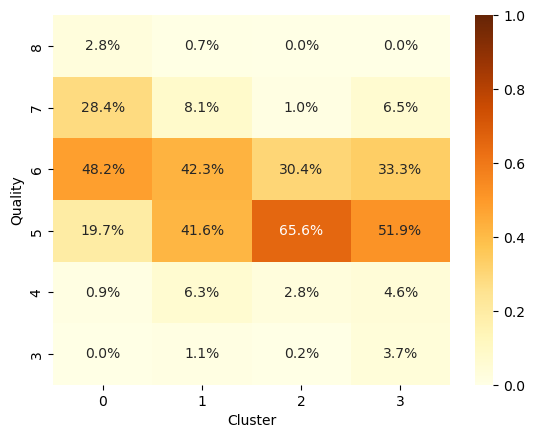

In [170]:
sns.heatmap((df_quality_in_clusters/df_quality_in_clusters.sum(axis=0)).sort_index(ascending=False), cmap='YlOrBr', vmin=0, vmax=1, annot=True, fmt='.1%')

# Závěr
- Když bych se na to podíval podle kvality, tak můžeme vidět, že v Clusteru 0 a Clusteru 1 je rozdíl, ale Cluster 1 a 2 vypadají dost podobně, takže je na zvážení, jestli by nebylo vhodnější je spojit.
- Cluster 0 obsahuje kvalitnější vína, kdežto Cluster 1 a 2 obsahují vína horší a průměrné.  
  
- Když se koukneme potom na features, které ovlivňují kvalitu, tak tato vína:  
    ## Cluster 0:
    - Zpravidla mívají průměrně více alkoholu, okolo 11%
    - Mají více kyseliny citrónové okolo 0.5
    - Mají více síranu okolo 0,6
    - Mají méně mastných kyselin (těkavé kyseliny) okolo 0.3
    ## Cluster 1 & 2:
    - Mají zpravidla méně alkoholu, okolo 9% až 10%
    - Mají méně kyseliny citrónové okolo 0 až 0.2
    - Mají méně síranu okolo 0.6
    - Mají více mastných kyselin okolo 0.75
- Chloridy (sůl) měly všechny clustery podobné, ale Cluster 0 měl trochu větší rozptyl

In [173]:
#Reset preprocessed df
dfToWorkWith = df_only_numeric[top_5_features_for_quality]
dfToWorkWith.loc[:,PowerColumns] = powerTransformer.fit_transform(dfToWorkWith[PowerColumns].values)
dfToWorkWith.loc[:,StanColumns] = stanScaler.fit_transform(dfToWorkWith[StanColumns].values)

C:\Users\msi pc\AppData\Local\Temp\ipykernel_8076\2836095135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToWorkWith.loc[:,PowerColumns] = powerTransformer.fit_transform(dfToWorkWith[PowerColumns].values)
C:\Users\msi pc\AppData\Local\Temp\ipykernel_8076\2836095135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfToWorkWith.loc[:,StanColumns] = stanScaler.fit_transform(dfToWorkWith[StanColumns].values)


In [254]:
dfToWorkWith

alcohol  sulphates  volatile acidity  citric acid  chlorides
0    -1.075025  -0.579207          0.961877    -1.531109  -0.243707
1    -0.500860   0.128950          1.967442    -1.531109   0.223875
2    -0.500860  -0.048089          1.297065    -1.255359   0.096353
3    -0.500860  -0.461180         -1.384443     1.398471  -0.264960
4    -1.075025  -0.579207          0.961877    -1.531109  -0.243707
...        ...        ...               ...          ...        ...
1594  0.292864  -0.461180          0.403229    -0.993315   0.053845
1595  0.888124   0.601055          0.123905    -0.867068  -0.541259
1596  0.734558   0.542042         -0.099554    -0.683294  -0.243707
1597 -0.018800   0.305990          0.654620    -0.743826  -0.264960
1598  0.734558   0.010924         -1.216849     1.031070  -0.434990

[1599 rows x 5 columns]

In [177]:
len(dfDefault.loc[(dfDefault.quality <= 4)].loc[(dfDefault.Cluster == 0)])

5

In [213]:
clusters = list(range(0,320))
dfTMP = dfDefault.copy()[0:320]
dfTMP['cluster'] = clusters
len(dfTMP.loc[(dfTMP.quality > 4) & (dfTMP.quality <= 6) & (dfTMP.cluster == 0)])

1

In [260]:
#Implementing gini index
def gini_index(estimator, X):
    clusters = estimator.predict(X)
    countClusters = len(np.unique(clusters))
    clustersLen = len(clusters)
    startIndex = X.index[0]
    dfTMP = dfDefault.copy()[startIndex: startIndex + clustersLen]
    dfTMP['cluster'] = clusters
    giniIndex = 0
    for i in range(0, countClusters):
        badWines = len(dfTMP.loc[(dfTMP.quality <= 4)].loc[(dfTMP.cluster == i)])
        normWines = len(dfTMP.loc[(dfTMP.quality > 4) & (dfTMP.quality <= 6) & (dfTMP.cluster == i)])
        goodWines = len(dfTMP.loc[(dfTMP.quality > 6)].loc[(dfTMP.cluster == i)])
        totalCount = len(dfTMP.loc[(dfTMP.cluster == i)])
        if totalCount == 0:
            totalCount = 1
        giniIndex += 1 - pow(badWines/totalCount,2) - pow(normWines/totalCount,2) - pow(goodWines/totalCount,2)
    return -giniIndex/countClusters #Return average gini index, has to be negative, because GridSearchCV tries to maximize scoring and lower gini is better 

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring={'gmm_bic_score': gmm_bic_score, 'gini_index': gini_index}, refit='gini_index'
)
grid_search.fit(dfToWorkWith)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             refit='gini_index',
             scoring={'gini_index': <function gini_index at 0x00000208C1C3EF20>,
                      'gmm_bic_score': <function gmm_bic_score at 0x00000208C1C3FA60>})

In [261]:
grid_search.cv_results_

{'mean_fit_time': array([0.12539067, 0.11339869, 0.1220036 , 0.12459531, 0.13340464,
        0.13979969, 0.13379955, 0.14259944, 0.14399557, 0.14600024,
        0.17799907, 0.20240002, 0.15200138, 0.17619872, 0.17040424,
        0.16380014, 0.16819973, 0.2056006 , 0.15199871, 0.15659919,
        0.17440109, 0.18919697, 0.19040136, 0.22019925]),
 'std_fit_time': array([0.0106266 , 0.00426972, 0.0071608 , 0.01105781, 0.00497314,
        0.00783323, 0.00256113, 0.00382562, 0.00635504, 0.00275644,
        0.02322021, 0.01605823, 0.0055523 , 0.03266498, 0.03596582,
        0.0139638 , 0.01585553, 0.04725474, 0.01054663, 0.00397795,
        0.01410323, 0.02199236, 0.00964455, 0.0195079 ]),
 'mean_score_time': array([0.00900059, 0.01100125, 0.01499777, 0.01620278, 0.03219571,
        0.02980018, 0.00959983, 0.01380067, 0.01820049, 0.0234005 ,
        0.03640318, 0.04840136, 0.00920119, 0.01939631, 0.01759586,
        0.02459912, 0.02999797, 0.03939877, 0.01060066, 0.01160064,
        0.021400

In [262]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_gmm_bic_score", "mean_test_gini_index"]
]
df["mean_test_gmm_bic_score"] = -df["mean_test_gmm_bic_score"]
df["mean_test_gini_index"] = -df["mean_test_gini_index"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_gmm_bic_score": "BIC score",
        "mean_test_gini_index": "Gini index",
    }
)
df.sort_values(by="Gini index").head()

Number of components Type of covariance    BIC score  Gini index
10                    5               tied  4266.654306    0.186806
11                    6               tied  4232.214626    0.213748
9                     4               tied  4392.993070    0.220356
5                     6          spherical  4093.448789    0.225367
8                     3               tied  4368.297344    0.232022

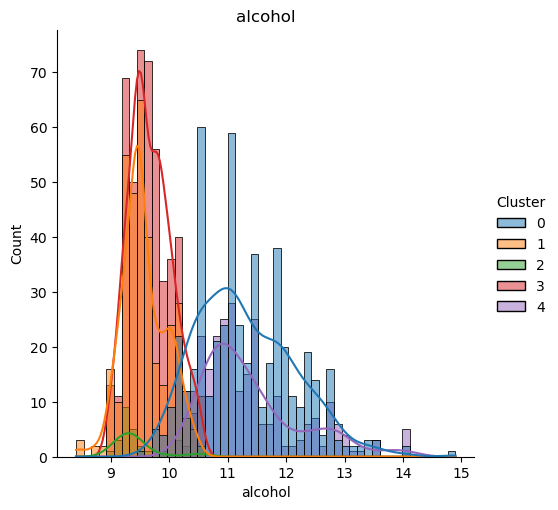

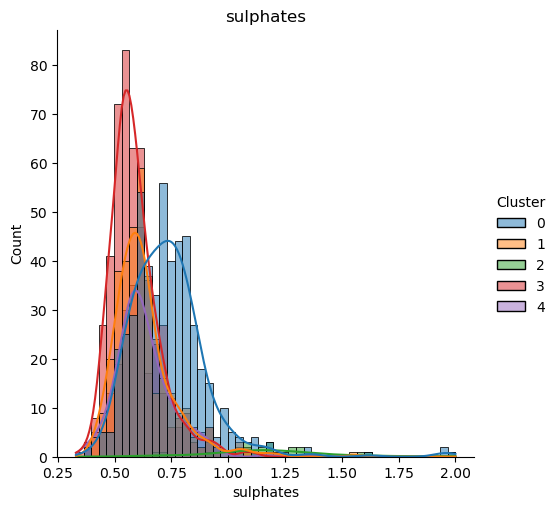

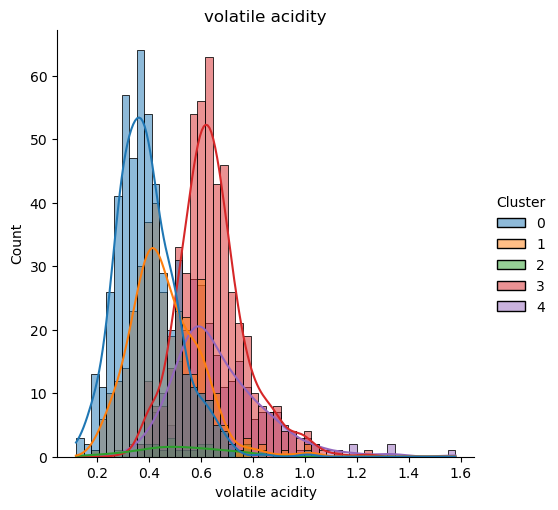

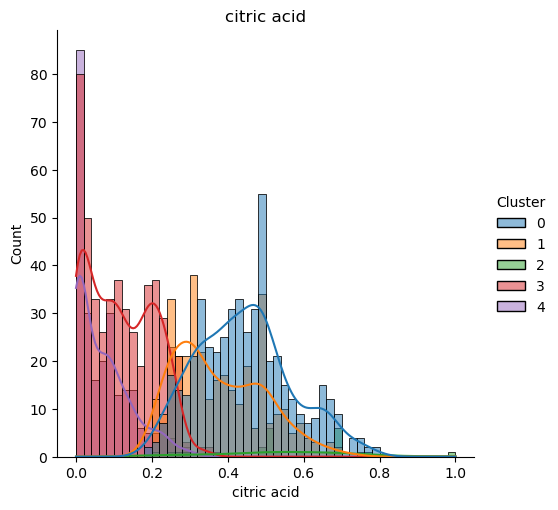

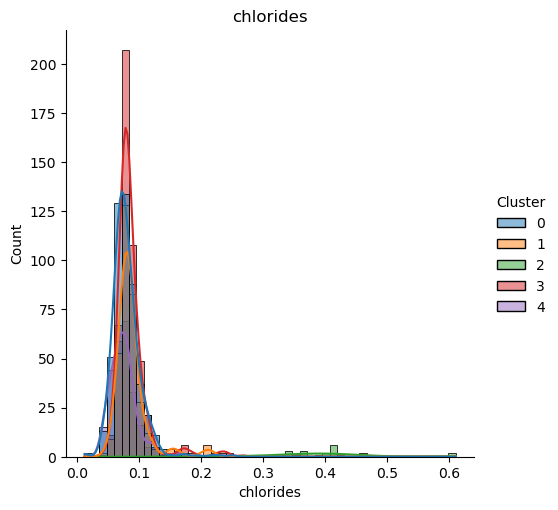

In [268]:
Y_ = grid_search.predict(dfToWorkWith)
dfDefault = pd.read_csv('C:\\Users\\msi pc\\Documents\\PythonProjects\\SU\\CV3\\winequality-red.csv')
dfDefault.loc[:,'Cluster'] = Y_
for column in list(dfToWorkWith.columns.values)[0:len(dfToWorkWith.columns.values)]:#Do displot for all columns from dfToWorkWith expect last 2
    sns.displot(data=dfDefault, x=column, hue='Cluster', palette='tab10', kde=True, bins=50)
    plt.title(column)
    plt.show()

<Axes: xlabel='k', ylabel='sse'>

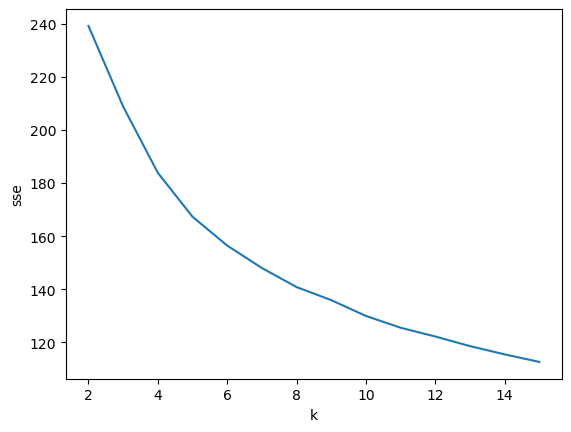

In [17]:
sns.lineplot(data=df_clustering_scores, x='k', y='sse')

<Axes: xlabel='k', ylabel='silhouette'>

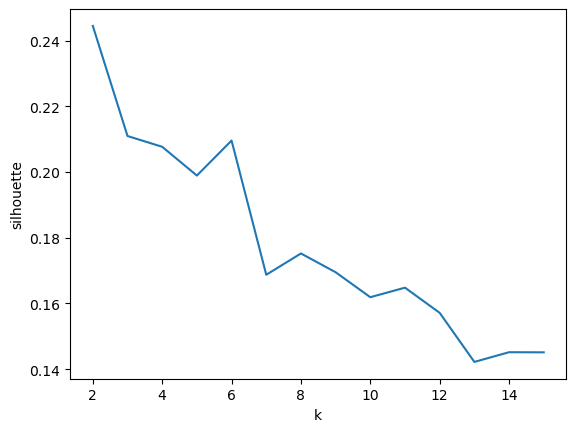

In [18]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

#### How many cluster do you see ?

#### Can you imagine other quality criteria to use over some real dataset? Do you know difference between external and internal criteria?

## Clustering interpretation

In [19]:
clustering = sklearn.cluster.KMeans(n_clusters=6, random_state=13)
clustering.fit(X_min_max_scaled)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=13)

In [20]:
df['cluster_id'] = clustering.labels_

<Axes: xlabel='cluster_id', ylabel='count'>

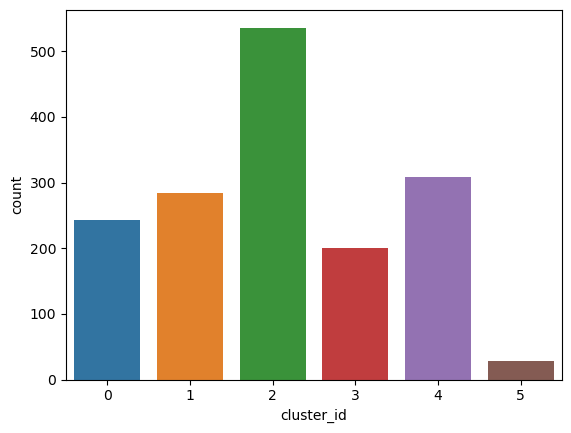

In [21]:
sns.countplot(data=df, x='cluster_id')

#### Let's take a look on the centroids

In [22]:
df.select_dtypes(np.number).groupby('cluster_id').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_id                                                                 
0                8.353086          0.354383     0.410741        2.402058   
1               11.057746          0.414454     0.510739        2.799648   
2                7.602052          0.633330     0.122761        2.236660   
3                6.436500          0.612400     0.077850        2.238500   
4                8.236688          0.529870     0.302338        3.179545   
5                8.357143          0.536429     0.497857        1.960714   

            chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster_id                                                                   
0            0.074136            13.360082             31.901235  0.995319   
1            0.089461            10.517606             31.197183  0.998793   
2            0.085616            11.532649             37.180970  0.996758   
3            0.069610            18.800000             41.070000  0.994312   
4            0.087867            28.402597             89.779221  0.997519   
5            0.341500            16.464286             67.678571  0.997058   

                  pH  sulphates    alcohol   quality  
cluster_id                                            
0           3.289465   0.713951  11.621811  6.320988  
1           3.170176   0.714296  10.422770  5.852113  
2           3.352743   0.595746   9.839055  5.333955  
3           3.493700   0.630650  11.677417  5.850000  
4           3.292500   0.627273   9.770996  5.311688  
5           3.032143   1.335000   9.410714  5.321429

#### Use describe() for quick inspection of numeric values in dataset.

In [23]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe(include='object'))

quality_class                    
                   count unique     top freq
cluster_id                                  
0                    243      3  normal  142
1                    284      3  normal  219
2                    536      3  normal  484
3                    200      3  normal  157
4                    308      3  normal  291
5                     28      3  normal   26

In [24]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe(exclude='object'))

fixed acidity                                                  \
                   count       mean       std  min     25%    50%    75%   
cluster_id                                                                 
0                  243.0   8.353086  1.108430  5.0   7.500   8.30   9.10   
1                  284.0  11.057746  1.421109  8.1  10.200  10.90  11.90   
2                  536.0   7.602052  0.816521  5.2   7.000   7.50   8.10   
3                  200.0   6.436500  0.765603  4.6   5.975   6.50   6.90   
4                  308.0   8.236688  1.104588  5.6   7.400   8.00   9.00   
5                   28.0   8.357143  0.625050  7.1   7.800   8.55   8.75   

                 volatile acidity                                           \
             max            count      mean       std   min     25%    50%   
cluster_id                                                                   
0           10.8            243.0  0.354383  0.101396  0.12  0.3000  0.340   
1           15.9            284.0  0.414454  0.125053  0.18  0.3200  0.400   
2           10.1            536.0  0.633330  0.156212  0.24  0.5300  0.620   
3            8.4            200.0  0.612400  0.157590  0.28  0.5100  0.590   
4           11.8            308.0  0.529870  0.155258  0.19  0.4175  0.530   
5            9.5             28.0  0.536429  0.144510  0.27  0.4375  0.505   

                           citric acid                                         \
                75%    max       count      mean       std   min   25%    50%   
cluster_id                                                                      
0           0.40000  1.010       243.0  0.410741  0.090272  0.21  0.34  0.400   
1           0.49000  0.890       284.0  0.510739  0.110055  0.22  0.45  0.490   
2           0.70500  1.580       536.0  0.122761  0.101537  0.00  0.03  0.100   
3           0.68250  1.115       200.0  0.077850  0.084329  0.00  0.01  0.050   
4           0.61125  1.240       308.0  0.302338  0.129965  0.00  0.23  0.295   
5           0.63500  0.780        28.0  0.497857  0.199302  0.18  0.29  0.510   

                       residual sugar                                     \
             75%   max          count      mean       std  min  25%  50%   
cluster_id                                                                 
0           0.46  0.68          243.0  2.402058  1.115979  0.9  1.9  2.2   
1           0.58  0.79          284.0  2.799648  1.410774  1.4  2.1  2.4   
2           0.21  0.42          536.0  2.236660  0.754602  1.2  1.8  2.1   
3           0.12  0.33          200.0  2.238500  0.847324  1.2  1.8  2.1   
4           0.37  0.78          308.0  3.179545  2.305705  1.4  2.0  2.5   
5           0.68  1.00           28.0  1.960714  0.462152  1.4  1.7  1.8   

                        chlorides                                             \
              75%   max     count      mean       std    min      25%    50%   
cluster_id                                                                     
0           2.500  12.9     243.0  0.074136  0.023196  0.038  0.06200  0.071   
1           2.900  15.5     284.0  0.089461  0.030101  0.050  0.07300  0.083   
2           2.400   6.1     536.0  0.085616  0.027263  0.039  0.07400  0.080   
3           2.325   8.3     200.0  0.069610  0.021193  0.012  0.05600  0.068   
4           3.000  15.4     308.0  0.087867  0.024179  0.045  0.07600  0.082   
5           2.000   3.5      28.0  0.341500  0.145266  0.053  0.26825  0.378   

                         free sulfur dioxide                                   \
              75%    max               count       mean        std  min   25%   
cluster_id                                                                      
0           0.081  0.230               243.0  13.360082   8.834274  3.0   6.0   
1           0.095  0.343               284.0  10.517606   6.811680  1.0   6.0   
2           0.089  0.332               536.0  11.532649   5.822159  1.0   7.0   
3

In [25]:
with pd.option_context('display.max_columns', None):
    display(df.select_dtypes(np.number).groupby('cluster_id').agg(['mean', 'min', 'max']))

fixed acidity            volatile acidity              citric acid  \
                    mean  min   max             mean   min    max        mean   
cluster_id                                                                      
0               8.353086  5.0  10.8         0.354383  0.12  1.010    0.410741   
1              11.057746  8.1  15.9         0.414454  0.18  0.890    0.510739   
2               7.602052  5.2  10.1         0.633330  0.24  1.580    0.122761   
3               6.436500  4.6   8.4         0.612400  0.28  1.115    0.077850   
4               8.236688  5.6  11.8         0.529870  0.19  1.240    0.302338   
5               8.357143  7.1   9.5         0.536429  0.27  0.780    0.497857   

                       residual sugar            chlorides                \
             min   max           mean  min   max      mean    min    max   
cluster_id                                                                 
0           0.21  0.68       2.402058  0.9  12.9  0.074136  0.038  0.230   
1           0.22  0.79       2.799648  1.4  15.5  0.089461  0.050  0.343   
2           0.00  0.42       2.236660  1.2   6.1  0.085616  0.039  0.332   
3           0.00  0.33       2.238500  1.2   8.3  0.069610  0.012  0.166   
4           0.00  0.78       3.179545  1.4  15.4  0.087867  0.045  0.235   
5           0.18  1.00       1.960714  1.4   3.5  0.341500  0.053  0.611   

           free sulfur dioxide            total sulfur dioxide               \
                          mean  min   max                 mean   min    max   
cluster_id                                                                    
0                    13.360082  3.0  45.0            31.901235   6.0  165.0   
1                    10.517606  1.0  38.0            31.197183   6.0  101.0   
2                    11.532649  1.0  36.0            37.180970   7.0  119.0   
3                    18.800000  3.0  51.0            41.070000   7.0  106.0   
4                    28.402597  9.0  72.0            89.779221  43.0  289.0   
5                    16.464286  5.0  36.0            67.678571  10.0  136.0   

             density                          pH             sulphates        \
                mean      min      max      mean   min   max      mean   min   
cluster_id                                                                     
0           0.995319  0.99007  0.99850  3.289465  2.89  3.66  0.713951  0.44   
1           0.998793  0.99572  1.00320  3.170176  2.86  3.54  0.714296  0.42   
2           0.996758  0.99396  1.00100  3.352743  2.88  3.69  0.595746  0.33   
3           0.994312  0.99064  0.99680  3.493700  3.22  4.01  0.630650  0.37   
4           0.997519  0.99316  1.00369  3.292500  3.01  3.60  0.627273  0.40   
5           0.997058  0.99623  0.99960  3.032143  2.74  3.26  1.335000  0.67   

                    alcohol              quality          
             max       mean  min   max      mean min max  
cluster_id                                                
0           1.36  11.621811  9.8  14.0  6.320988   4   8  
1           1.36  10.422770  8.4  14.9  5.852113   3   8  
2           1.20   9.839055  8.7  11.5  5.333955   3   7  
3           0.94  11.677417  9.9  14.0  5.850000   4   8  
4           1.22   9.770996  8.5  12.3  5.311688   3   7  
5           2.00   9.410714  9.0  10.2  5.321429   4   7

### Graphical ilustration of values in the clusters

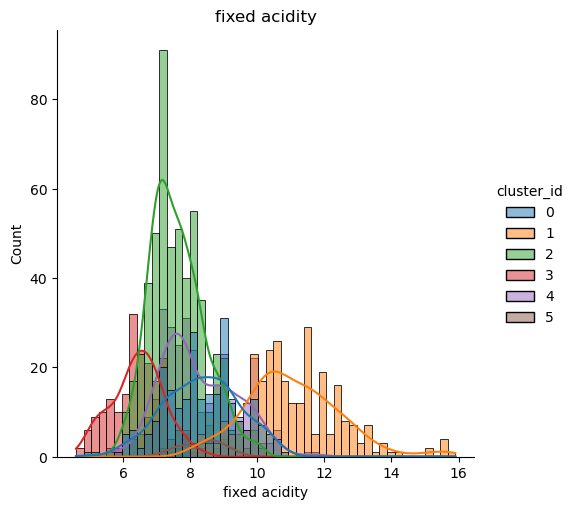

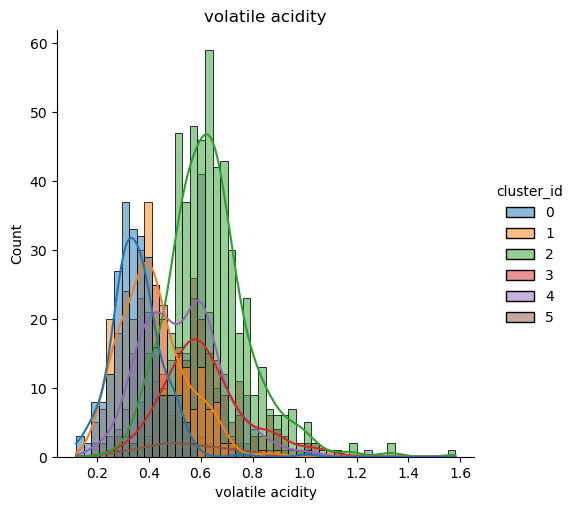

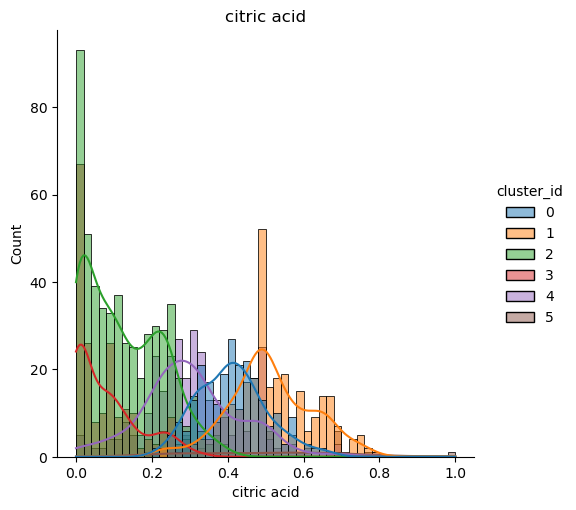

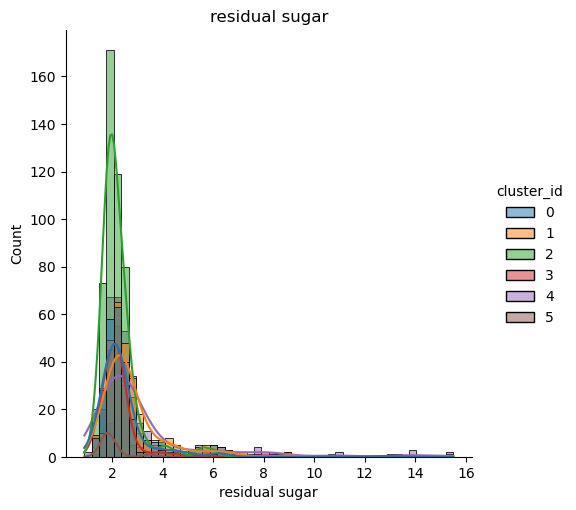

In [26]:
for column in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']:
    sns.displot(data=df, x=column, hue='cluster_id', palette='tab10', kde=True, bins=50)
    plt.title(column)
    plt.show()

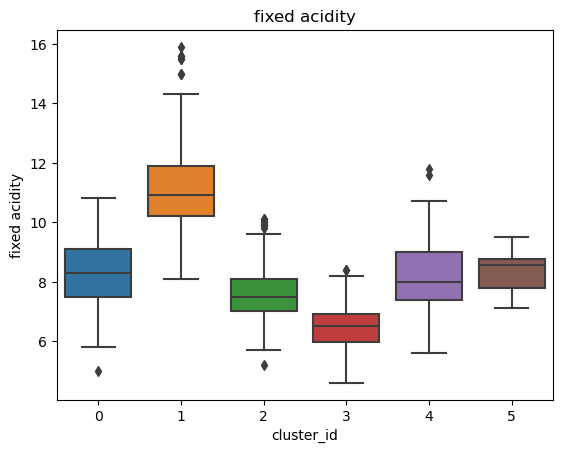

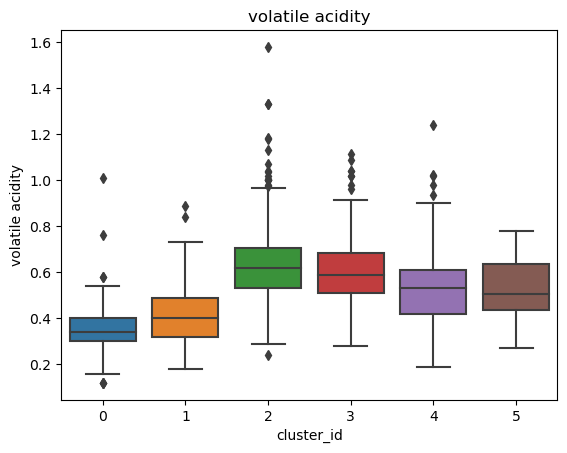

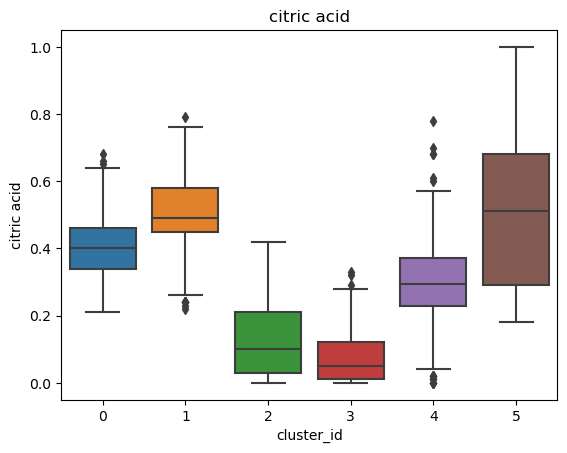

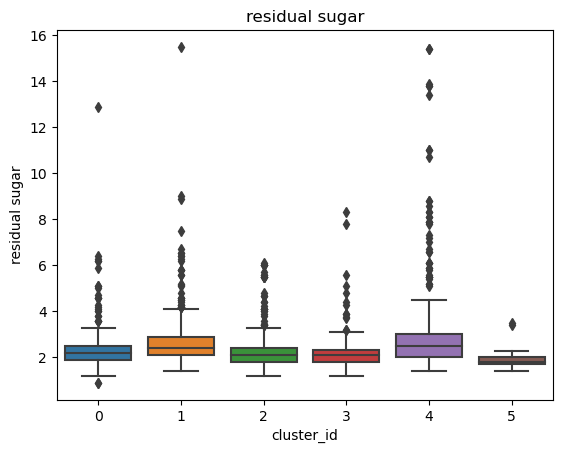

In [27]:
for column in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']:
    sns.boxplot(data=df, y=column, x='cluster_id')
    plt.title(column)
    plt.show()

#### Are there any differences attributes for different clusters?

#### Clusters possible interpretation

For cluster 0 there are lower *volatile acidity* values.

The cluster 1 represents the wines with high *fixed acidity* and *citric acid* values.

The biggest cluster 2 (consisted of 536 points out of total 1599 points) has small sulfur values and relatively small residual sugar.

etc...

### Can we see differences in wine quality for different clusters?

<Axes: xlabel='cluster_id', ylabel='quality'>

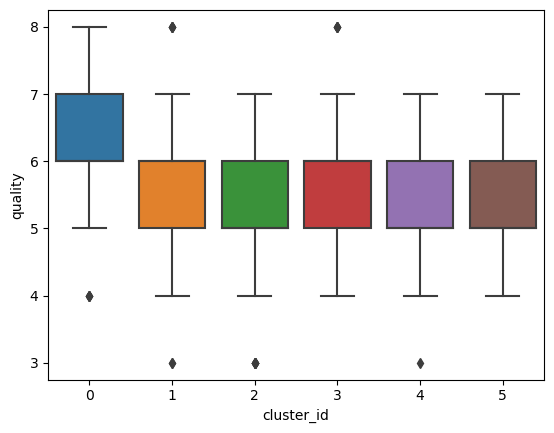

In [28]:
sns.boxplot(data=df, y='quality', x='cluster_id')

In [29]:
df.groupby('cluster_id').quality.value_counts().head(20)

cluster_id  quality
0           6          121
            7           87
            5           21
            8           10
            4            4
1           6          128
            5           91
            7           55
            8            4
            4            4
            3            2
2           5          306
            6          178
            4           25
            7           20
            3            7
3           6          119
            5           38
            7           26
            4           13
Name: count, dtype: int64

In [30]:
df_quality_in_clusters = pd.pivot(df.groupby('cluster_id').quality.value_counts().reset_index(name='count'), index='quality', columns=['cluster_id'], values='count')
df_quality_in_clusters.fillna(0, inplace=True)
df_quality_in_clusters

cluster_id      0      1      2      3      4     5
quality                                            
3             0.0    2.0    7.0    0.0    1.0   0.0
4             4.0    4.0   25.0   13.0    6.0   1.0
5            21.0   91.0  306.0   38.0  207.0  18.0
6           121.0  128.0  178.0  119.0   84.0   8.0
7            87.0   55.0   20.0   26.0   10.0   1.0
8            10.0    4.0    0.0    4.0    0.0   0.0

<Axes: xlabel='cluster_id', ylabel='quality'>

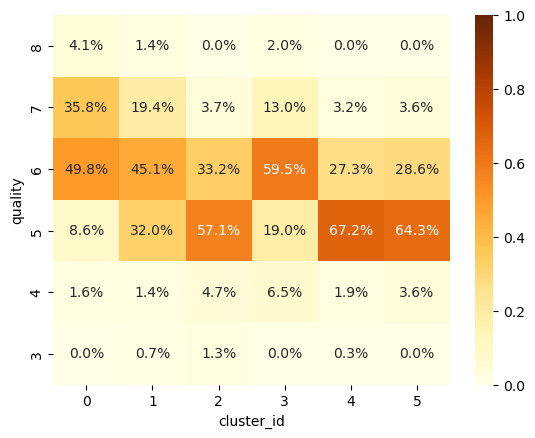

In [31]:
sns.heatmap((df_quality_in_clusters/df_quality_in_clusters.sum(axis=0)).sort_index(ascending=False), cmap='YlOrBr', vmin=0, vmax=1, annot=True, fmt='.1%')

<Axes: xlabel='cluster_id', ylabel='quality'>

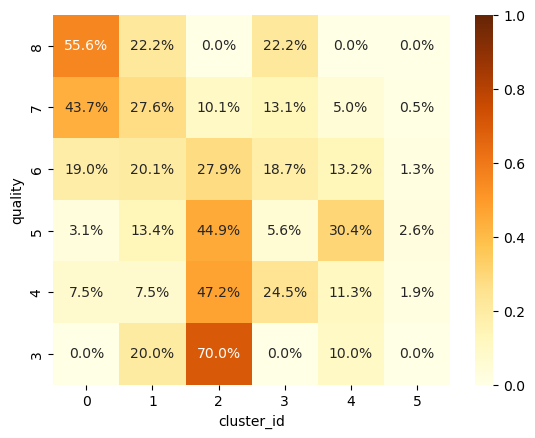

In [32]:
sns.heatmap((df_quality_in_clusters.T/df_quality_in_clusters.sum(axis=1)).T.sort_index(ascending=False), cmap='YlOrBr', vmin=0, vmax=1, annot=True, fmt='.1%')

#### How can we interpret previous illustrations?

#### Description of clusters based on its quality values:

- TODO: Fill in some observations

## DBSCAN + distance analysis
- https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

We are going to use only top 5 selected features with the highest correlation to quality for following clustering.

In [33]:
top_5_features_for_quality

['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'chlorides']

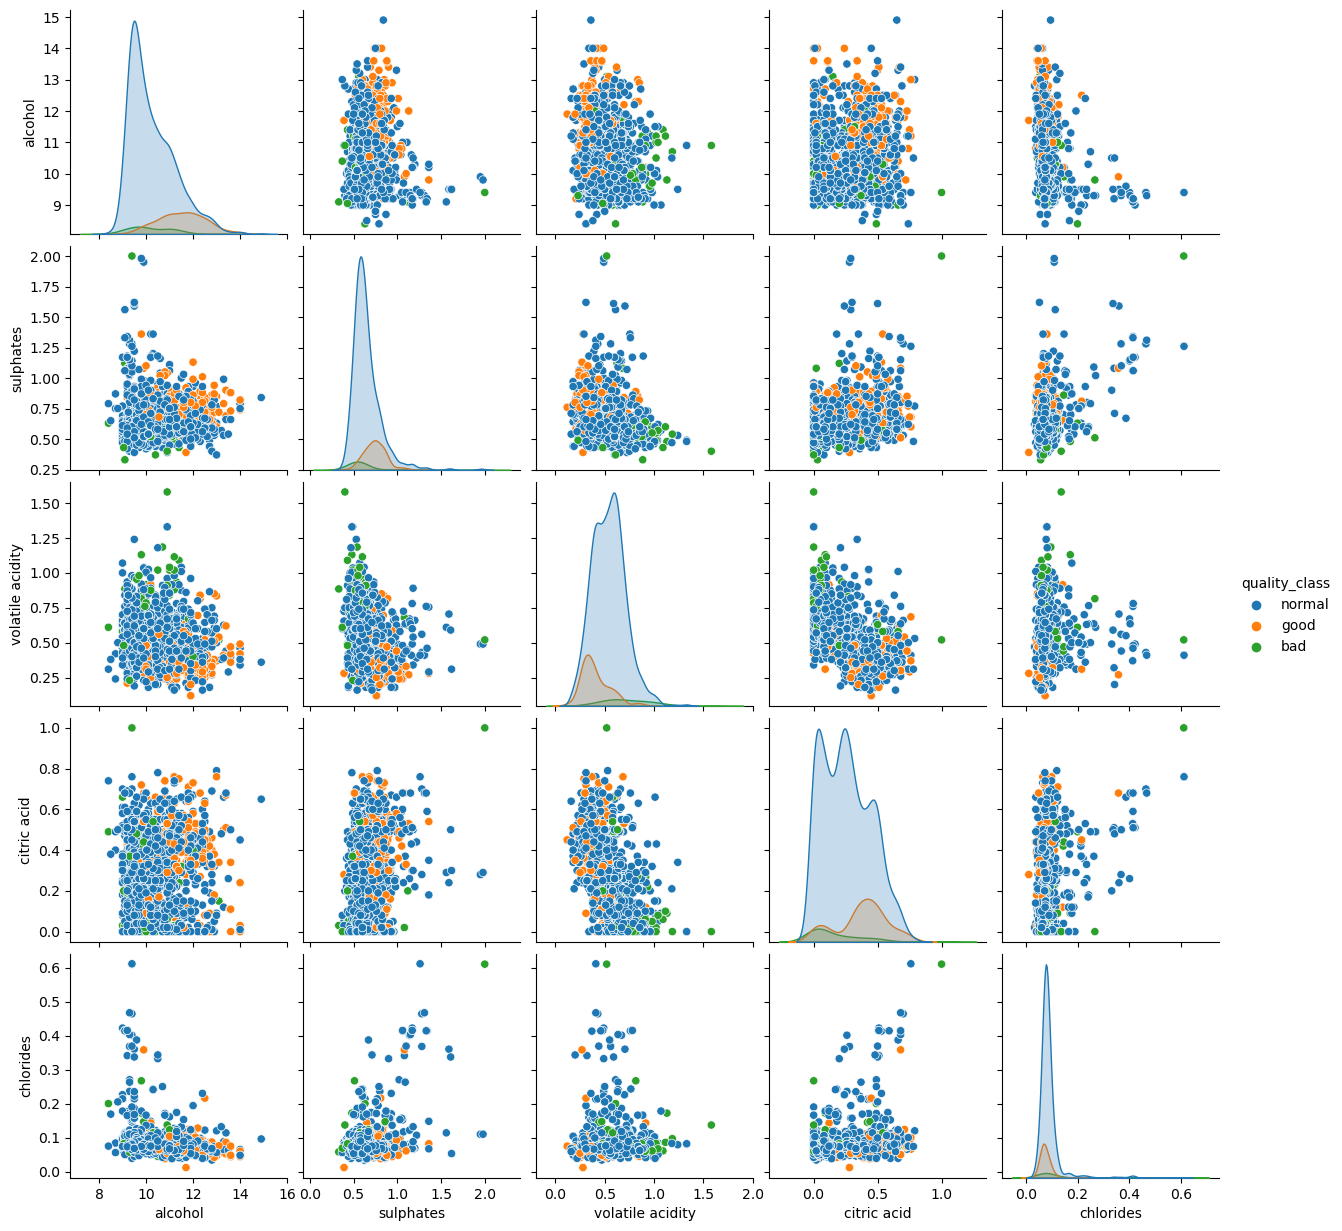

In [34]:
sns.pairplot(data=df[top_5_features_for_quality + ['quality_class']], hue='quality_class')

In [35]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(df[top_5_features_for_quality].values)

In [36]:
clustering = sklearn.cluster.DBSCAN()
clustering.fit(X_min_max_scaled)

DBSCAN()

In [37]:
pd.Series(clustering.labels_).value_counts()

 0    1598
-1       1
Name: count, dtype: int64

What does the number -1 means?
#### Find better parameters *eps* and *min_pts* and visualize you result

In [38]:
clustering = sklearn.cluster.DBSCAN(eps=0.25, min_samples=10).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

 0    1572
 1      14
-1      13
Name: count, dtype: int64

#### Lets get insight into distances in our dataset, to allow us to find better configuration of parameters for DBSCAN

In [39]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix

array([[0.        , 0.15968436, 0.10341041, ..., 0.32767594, 0.19757919,
        0.59720847],
       [0.15968436, 0.        , 0.09369381, ..., 0.34396628, 0.21422375,
        0.64048837],
       [0.10341041, 0.09369381, 0.        , ..., 0.27532284, 0.13596887,
        0.56192497],
       ...,
       [0.32767594, 0.34396628, 0.27532284, ..., 0.        , 0.15612282,
        0.37080368],
       [0.19757919, 0.21422375, 0.13596887, ..., 0.15612282, 0.        ,
        0.43745966],
       [0.59720847, 0.64048837, 0.56192497, ..., 0.37080368, 0.43745966,
        0.        ]])

<Axes: ylabel='Count'>

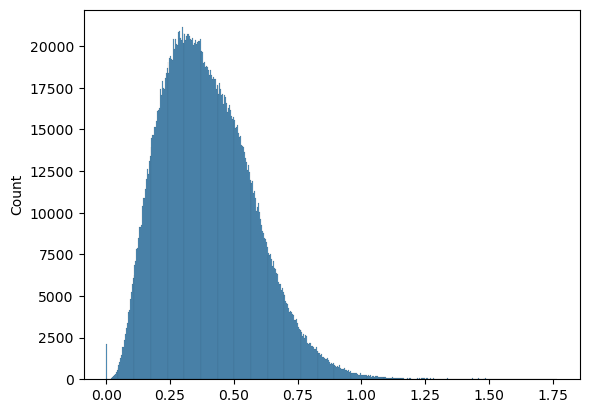

In [40]:
sns.histplot(distance_matrix.flatten())

In [41]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix.sort(axis=1)
distance_matrix

array([[0.        , 0.        , 0.0112855 , ..., 1.10541131, 1.26114105,
        1.59795674],
       [0.        , 0.02513492, 0.08655066, ..., 1.08358884, 1.24060749,
        1.55562205],
       [0.        , 0.04027696, 0.0550023 , ..., 1.03719384, 1.20987713,
        1.53418628],
       ...,
       [0.        , 0.        , 0.05638684, ..., 0.95610041, 1.16325918,
        1.47395465],
       [0.        , 0.03367938, 0.05554833, ..., 0.95709631, 1.16611863,
        1.48030108],
       [0.        , 0.05305872, 0.06462538, ..., 1.0078164 , 1.05036072,
        1.35195429]])

<Axes: ylabel='Count'>

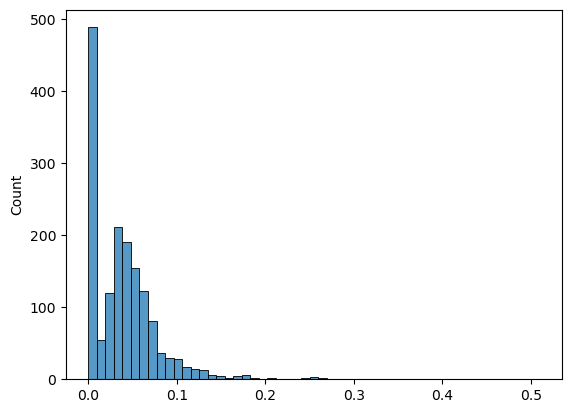

In [42]:
sns.histplot(distance_matrix[:, 1])

<Axes: ylabel='Count'>

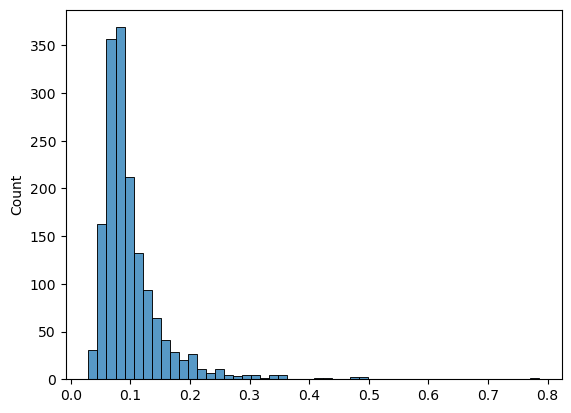

In [43]:
sns.histplot(distance_matrix[:, 10], bins=50)

#### What can we notice in previous visualizations?

In [44]:
clustering = sklearn.cluster.DBSCAN(eps=0.07, min_samples=10).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

-1    781
 0    703
 1     41
 5     22
 3     18
 2     14
 6     10
 4     10
Name: count, dtype: int64

#### Description of clusters (and probably noise points too)

- We should consider removing -1 cluster out of interpretation section

In [45]:
df['cluster_id'] = clustering.labels_

In [46]:
df.groupby('cluster_id').quality_class.value_counts()

cluster_id  quality_class
-1          normal           595
            good             145
            bad               41
 0          normal           639
            good              49
            bad               15
 1          normal            38
            bad                3
 2          normal            14
 3          normal            14
            bad                4
 4          normal            10
 5          good              14
            normal             8
 6          good               9
            normal             1
Name: count, dtype: int64

In [47]:
df_quality_in_clusters = pd.pivot(df.groupby('cluster_id').quality.value_counts().reset_index(name='count'), index='quality', columns=['cluster_id'], values='count')
df_quality_in_clusters.fillna(0, inplace=True)
df_quality_in_clusters.sort_index(ascending=False)

cluster_id     -1      0     1     2     3    4     5    6
quality                                                   
8            14.0    2.0   0.0   0.0   0.0  0.0   1.0  1.0
7           131.0   47.0   0.0   0.0   0.0  0.0  13.0  8.0
6           349.0  250.0   9.0   3.0  11.0  8.0   7.0  1.0
5           246.0  389.0  29.0  11.0   3.0  2.0   1.0  0.0
4            32.0   14.0   3.0   0.0   4.0  0.0   0.0  0.0
3             9.0    1.0   0.0   0.0   0.0  0.0   0.0  0.0

<Axes: xlabel='cluster_id', ylabel='quality'>

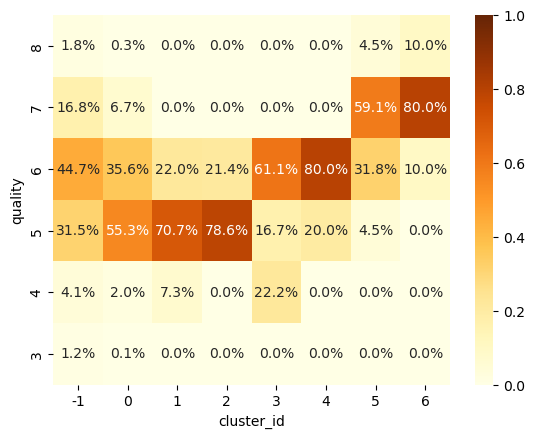

In [48]:
sns.heatmap((df_quality_in_clusters/df_quality_in_clusters.sum(axis=0)).sort_index(ascending=False), cmap='YlOrBr', vmin=0, vmax=1, annot=True, fmt='.1%')

In [49]:
colorpalette = dict([(i, sns.color_palette('tab10')[i]) for i in range(10)])
colorpalette[-1] = (0.8,0.8,0.8)
colorpalette

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 8: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 9: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 -1: (0.8, 0.8, 0.8)}

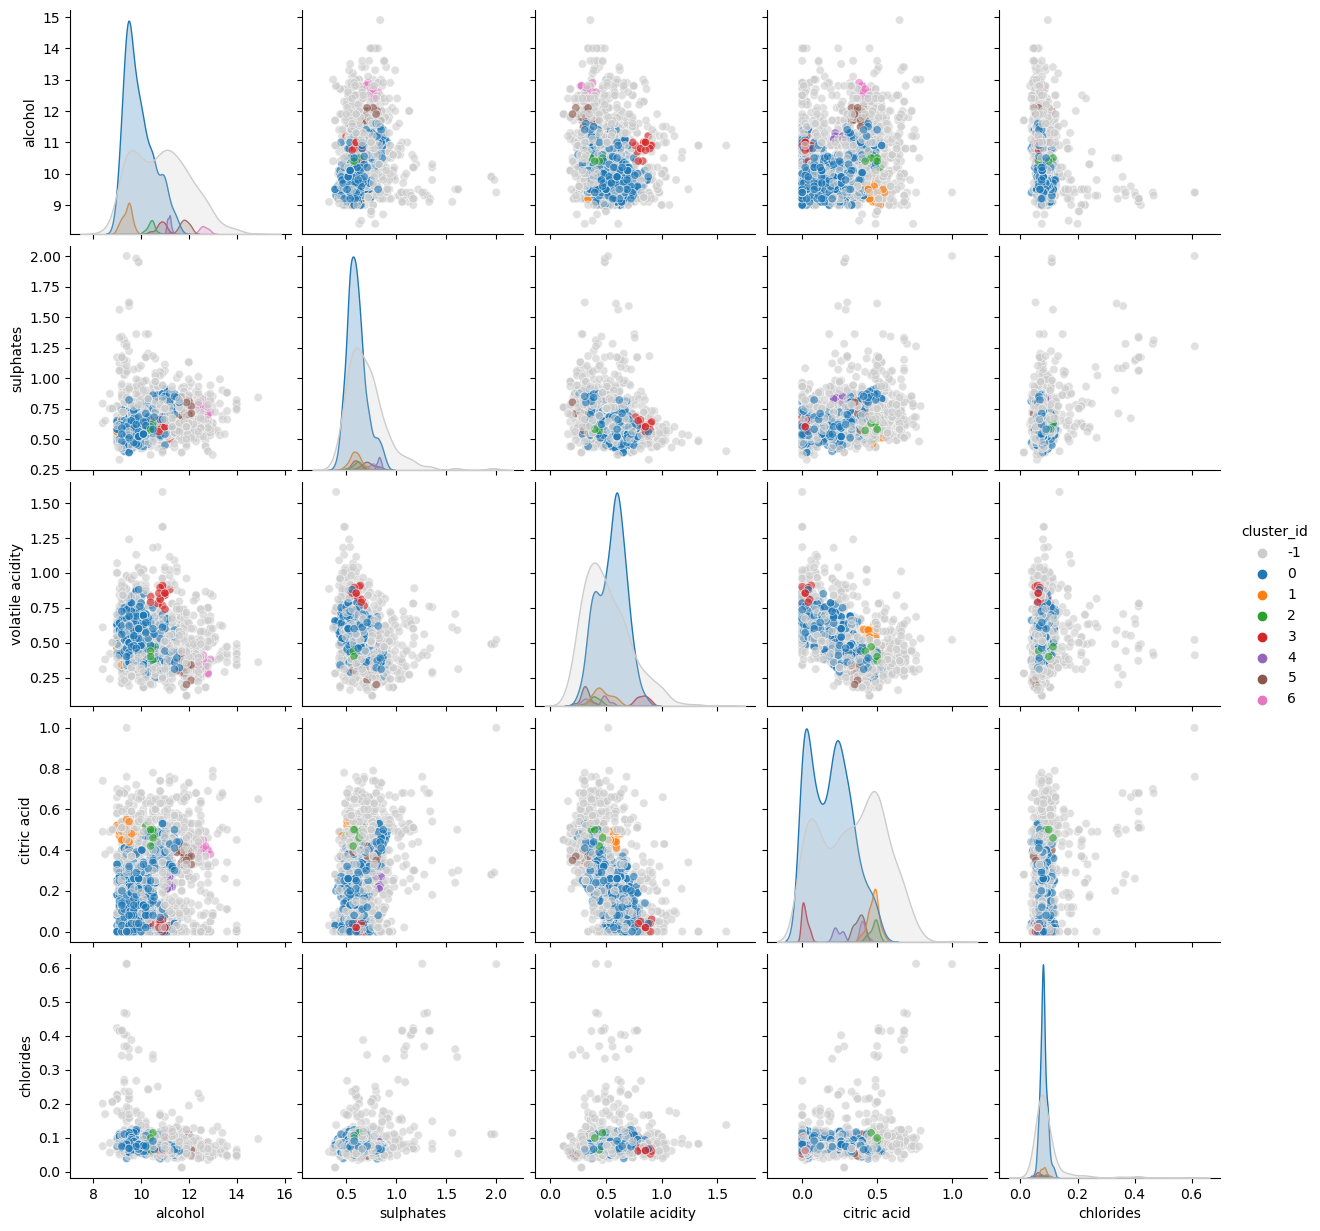

In [50]:
sns.pairplot(data=df[top_5_features_for_quality + ['cluster_id']], hue='cluster_id', palette=colorpalette, plot_kws={'alpha':0.6})

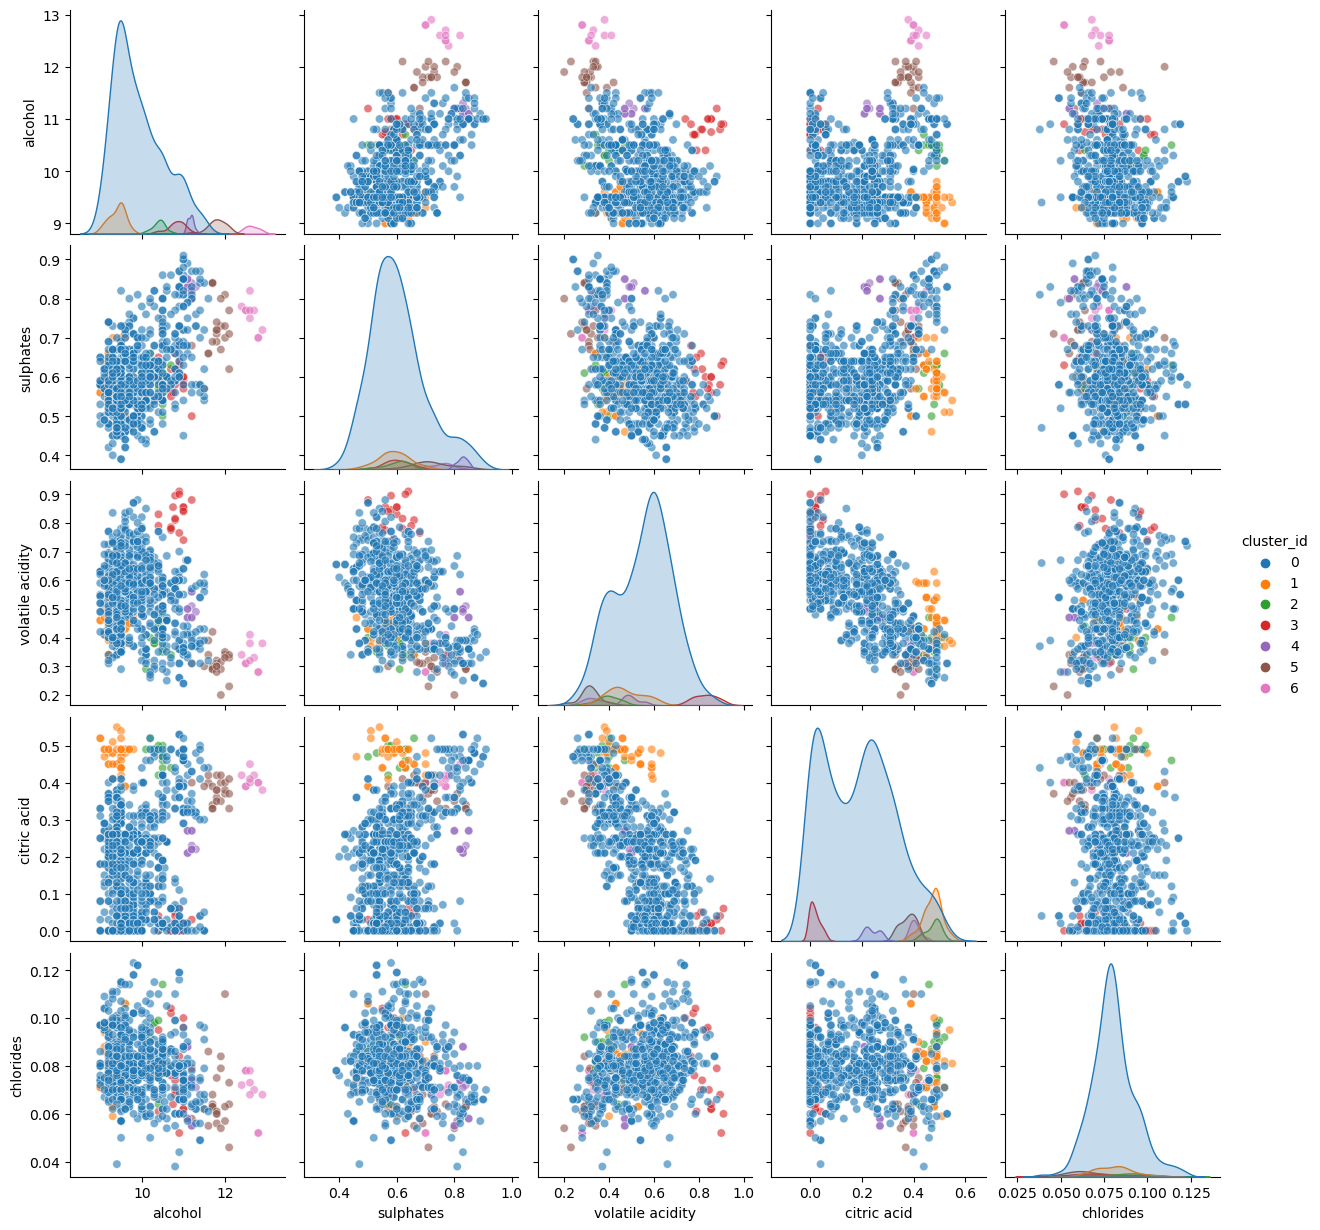

In [51]:
sns.pairplot(data=df[df.cluster_id != -1][top_5_features_for_quality + ['cluster_id']].sort_values('cluster_id', ascending=False), hue='cluster_id', palette=colorpalette, plot_kws={'alpha':0.6})

### Discussion: What to do with group cluster_id=-1? Should it be included or excluded from clustering interpretation?

#### There goes further description of clusters...

## Is the scaling of the feature good?

<Axes: xlabel='fixed acidity', ylabel='Count'>

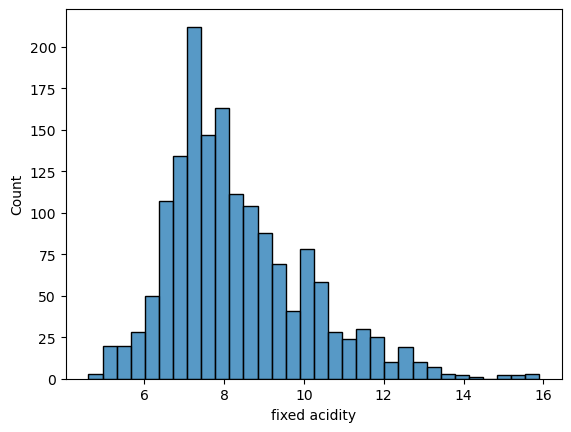

In [52]:
sns.histplot(data=df_only_numeric, x='fixed acidity')

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

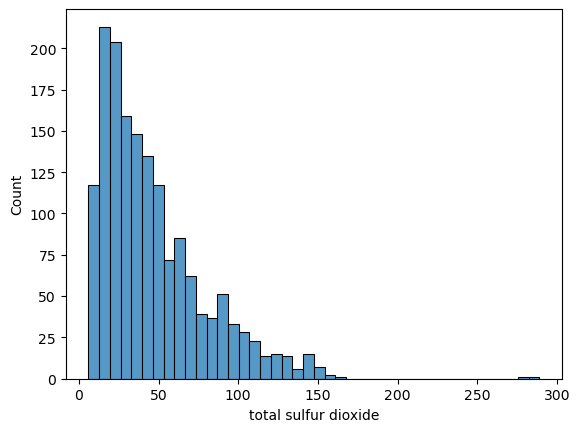

In [53]:
sns.histplot(data=df, x='total sulfur dioxide')

<Axes: xlabel='residual sugar', ylabel='Count'>

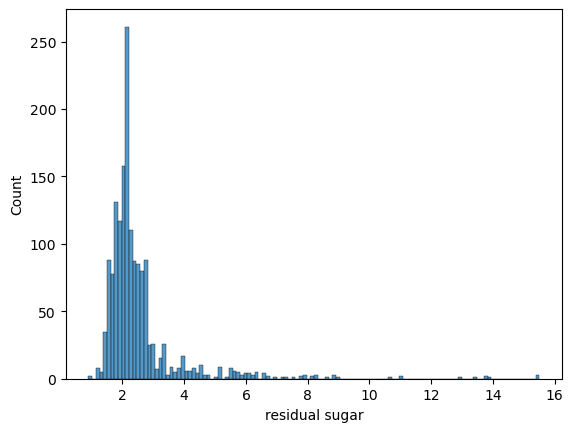

In [54]:
sns.histplot(data=df, x='residual sugar')

In [55]:
distance_matrix_first_column = scipy.spatial.distance_matrix(scaler.fit_transform(df[['fixed acidity']]), scaler.fit_transform(df[['fixed acidity']]))
distance_matrix_second_column = scipy.spatial.distance_matrix(scaler.fit_transform(df[['total sulfur dioxide']]), scaler.fit_transform(df[['total sulfur dioxide']]))
distance_matrix_third_column = scipy.spatial.distance_matrix(scaler.fit_transform(df[['residual sugar']]), scaler.fit_transform(df[['residual sugar']]))

In [56]:
distance_matrix_first_column[np.triu_indices_from(distance_matrix_first_column, k=1)]

array([0.03539823, 0.03539823, 0.33628319, ..., 0.03539823, 0.02654867,
       0.00884956])

<Axes: ylabel='Count'>

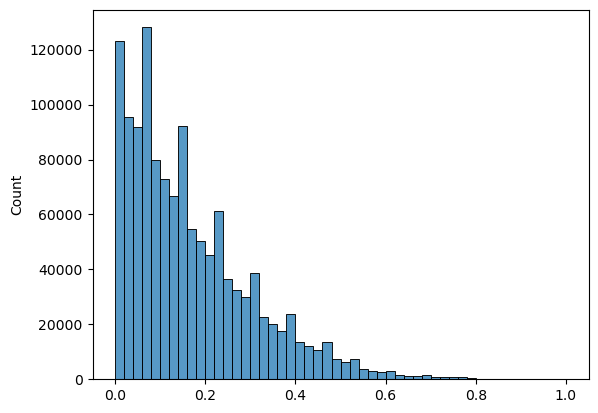

In [57]:
sns.histplot(distance_matrix_first_column[np.triu_indices_from(distance_matrix_first_column, k=1)], bins=50)

<Axes: ylabel='Count'>

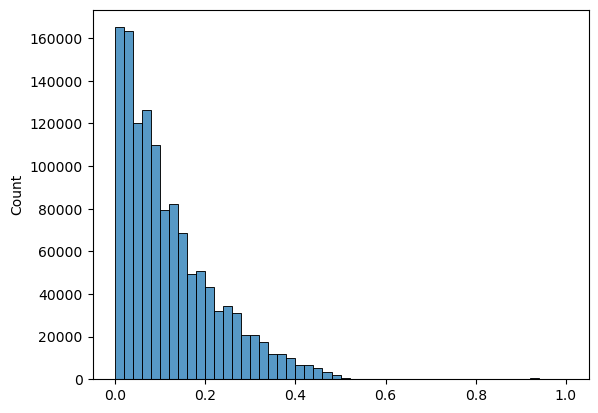

In [58]:
sns.histplot(distance_matrix_second_column[np.triu_indices_from(distance_matrix_second_column, k=1)], bins=50)

<Axes: ylabel='Count'>

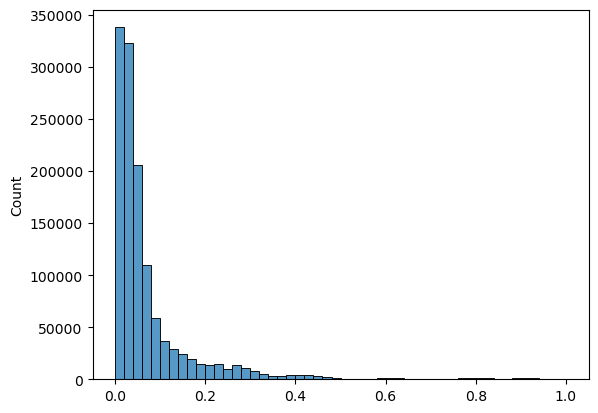

In [59]:
sns.histplot(distance_matrix_third_column[np.triu_indices_from(distance_matrix_third_column, k=1)], bins=50)

### How would you treat non-numerical attributes during preprocessing?

### For more info about Sklearn clustering, take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering

# Tasks (2p)

## Part 1
Continue with clustering analysis:

MinMax scaling is not the only best possibility for scaling of numerical attributes.

1. Take a look into documentation (https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing) and choose other method for scaling your features.

2. Apply clustering method of your choice (https://scikit-learn.org/stable/modules/clustering.html) for differently scaled data.

3. Describe detected clusters.

As a bonus (voluntary), it may be interesting to combine differently scaled features - e.g. feature1 scaled using MinMax, feature2 scaled using PowerTransform etc. And used this dataset for clustering.

## Part 2
Pick one from the following tasks:
- a\) Implement function for Entropy or Gini index as a **clustering external validation** during the "elbow method".

or

- b\) Use a Mahalanobis distance with some clustering method. (Hint: take a look into https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html and look for Sklearn clustering method able to work with "precomputed" distance matrix)